In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data=pd.read_csv(r"C:\Users\Anandan Suresh\Downloads\Public Transport forecast\Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241128.csv")

In [4]:
data.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [5]:
data.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [6]:
data.isnull().sum()

Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64

In [7]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y') 
data = data.sort_values(by='Date')

In [8]:
data.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
1013,2019-07-01,15987,9962,407,21223,3715,NaN
1120,2019-07-02,16895,10656,409,21715,3993,NaN
1451,2019-07-03,16613,10658,427,22025,3638,NaN
1171,2019-07-04,16604,10445,437,21868,3576,NaN
1523,2019-07-05,16040,10532,400,20697,2856,NaN


In [9]:
data['Other'].fillna(data['Other'].mean()) 

1013    43.390411
1120    43.390411
1451    43.390411
1171    43.390411
1523    43.390411
          ...    
1662    43.390411
1330    43.390411
1731    43.390411
1652    43.390411
160     43.390411
Name: Other, Length: 1918, dtype: float64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

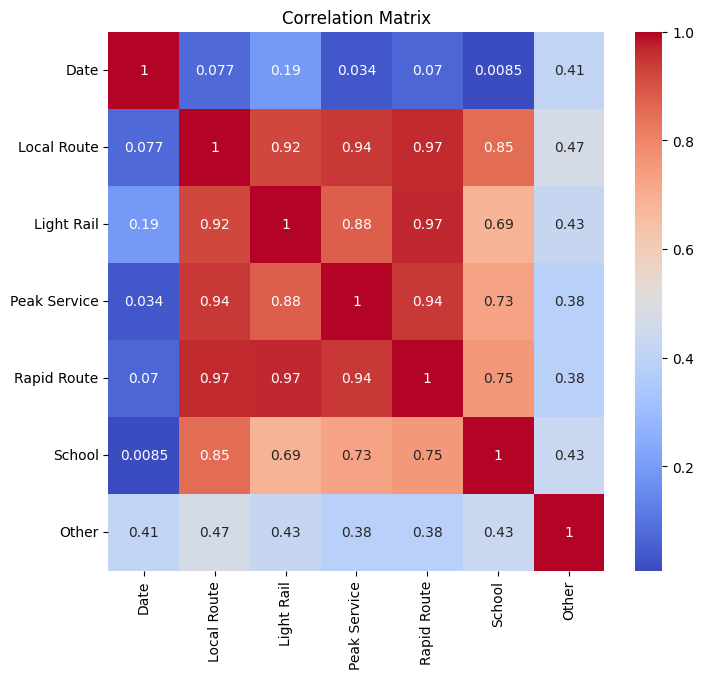

In [11]:
plt.figure(figsize=(8, 7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [35]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [36]:
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05: 
        print("Series is not stationary, applying differencing...")
        return series.diff().dropna() 
    


columns_to_check = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

for column in columns_to_check:
    print(f"\nChecking stationarity for column: {column}")
    series = data[column] 
    check_stationarity(series)




Checking stationarity for column: Local Route
ADF Statistic: -4.580035661257344
p-value: 0.0001405680369891524

Checking stationarity for column: Light Rail
ADF Statistic: -3.4960587014034448
p-value: 0.008088893778396278

Checking stationarity for column: Peak Service
ADF Statistic: -3.870723309372974
p-value: 0.002261189892356148

Checking stationarity for column: Rapid Route
ADF Statistic: -3.8281016528348837
p-value: 0.0026325357298383027

Checking stationarity for column: School
ADF Statistic: -7.133911909207521
p-value: 3.4605568058212554e-10


In [39]:
def forecast_service_auto(data, column, days=7):
    model = auto_arima(data[column],seasonal=False,trace=True)
    forecast = model.predict(n_periods=days)
    
    forecast_rounded = forecast.round().astype(int)
    print(f"Forecast for {column} (next {days} days):")
    print(forecast_rounded)
    return forecast_rounded


In [40]:
forecasts = {}
for column in ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']:
    forecasts[column] = forecast_service_auto(data.set_index('Date'), column)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=37427.631, Time=4.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=38692.473, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=38692.884, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=38687.025, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=38690.477, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=37845.025, Time=3.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=37818.890, Time=0.72 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.94 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=37123.425, Time=4.60 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=37735.609, Time=4.42 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=37110.214, Time=4.98 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=36440.603, Time=4.89 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=36511.581, Time=5.29 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=36058.884, Time=4.70 sec
 ARIMA(5,1,2)(0,0,0)[0] i

C:\Users\Anandan Suresh\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,1,2)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\Anandan Suresh\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\Anandan Suresh\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\Anandan Suresh\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\Anandan Suresh\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=22653.939, Time=3.47 sec
 ARIMA(2,1,4)(0,0,0)[0]             : AIC=22567.014, Time=4.29 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=23430.590, Time=1.96 sec
 ARIMA(3,1,4)(0,0,0)[0]             : AIC=22723.184, Time=4.93 sec
 ARIMA(2,1,5)(0,0,0)[0]             : AIC=22364.347, Time=5.44 sec
 ARIMA(1,1,5)(0,0,0)[0]             : AIC=23357.055, Time=3.53 sec
 ARIMA(3,1,5)(0,0,0)[0]             : AIC=22339.793, Time=5.48 sec
 ARIMA(4,1,5)(0,0,0)[0]             : AIC=21873.159, Time=5.89 sec
 ARIMA(4,1,4)(0,0,0)[0]             : AIC=22096.862, Time=4.38 sec
 ARIMA(5,1,5)(0,0,0)[0]             : AIC=21657.642, Time=5.28 sec
 ARIMA(5,1,4)(0,0,0)[0]             : AIC=21765.778, Time=5.88 sec
 ARIMA(5,1,5)(0,0,0)[0] intercept   : AIC=21661.313, Time=11.38 sec

Best model:  ARIMA(5,1,5)(0,0,0)[0]          
Total fit time: 111.700 seconds
Forecast for Peak Service (next 7 days):
2024-09-30    1

In [41]:
forecast_df = pd.DataFrame(forecasts)
forecast_df.to_csv('forecasts.csv', index=False)